In [1]:
import numpy as np
import wisps
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii, fits
import numba
from tqdm import tqdm
%matplotlib inline

In [2]:
d=fits.open('/users/caganze/total_north_F160W.fits')

In [3]:
DIST_DATAFRAME=pd.DataFrame.from_records([x.samples for x in wisps.OBSERVED_POINTINGS])

In [4]:
montedists=np.concatenate(DIST_DATAFRAME.apply(lambda x: np.concatenate(x)).values).astype(np.float64)

In [5]:
@numba.vectorize
def proper_motion(vt, d):
    """
    mu in arcsec/y
    d in pc
    vt in
    """
    return vt/(4.74*d)
    

In [6]:
def get_proper_motions(spt):
    dists=np.concatenate(DIST_DATAFRAME[spt]).astype(float)
    vts=np.random.uniform(10, 100, len(dists))
    return  proper_motion(vts, dists)

In [7]:
vts=np.random.uniform(10, 100, len(montedists))

In [8]:
mus= proper_motion(vts, montedists)

In [9]:
from scipy.stats import kde

In [10]:
x=vts
y=mus

In [11]:
idx=np.arange(len(x))

In [12]:
randomint=np.random.choice(idx, size=100000)

Text(0, 0.5, 'log $\\mu$ (arcsec/yr)')

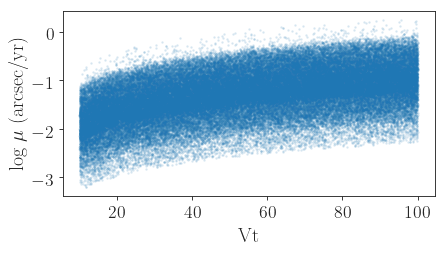

In [13]:
plt.scatter(x[randomint], np.log10(y[randomint]), s=2, alpha=0.1)
#plt.yscale('log')

plt.xlabel('Vt')
plt.ylabel(r'log $\mu$ (arcsec/yr)')

Text(0.5, 0, 'log $\\mu$ (arcsec/yr)')

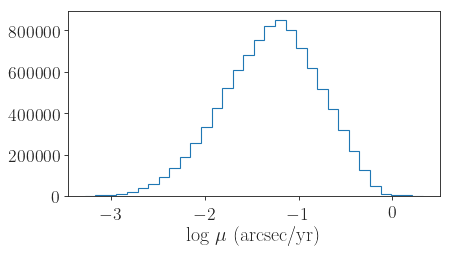

In [14]:
h=plt.hist(np.log10(y), bins=32, histtype='step')
plt.xlabel(r'log $\mu$ (arcsec/yr)')

In [15]:
musspt=[]
for s in tqdm(np.arange(20, 38)):
    musspt.append(get_proper_motions(s))

100%|██████████| 18/18 [00:00<00:00, 32.69it/s]


In [16]:
import matplotlib
from matplotlib import cm

norm = matplotlib.colors.Normalize(vmin=20., vmax=37.0)

Text(0.5, 0, 'log $\\mu$ (arcsec/yr)')

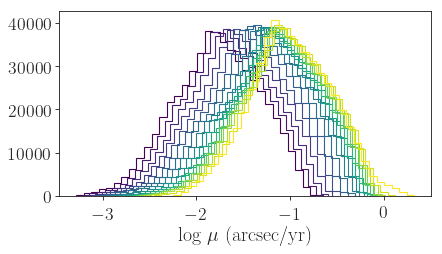

In [17]:
fig, ax=plt.subplots()

for idx,m in enumerate(musspt):
    #print (idx)
    h=plt.hist(np.log10(m), bins=32, histtype='step', color=cm.viridis(norm(idx+20)))
ax.set_xlabel(r'log $\mu$ (arcsec/yr)')

Text(0.5, 0, 'd (pc)')

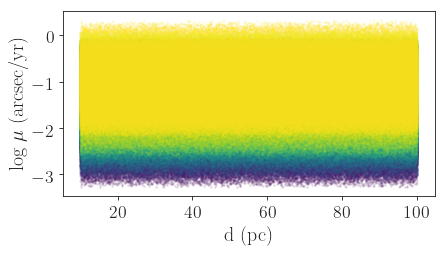

In [18]:
fig, ax=plt.subplots()

for idx,m in enumerate(musspt):
    x=np.random.uniform(10, 100, len(m))
    ax.scatter(x, np.log10(m), s=2, alpha=0.1, color=cm.viridis(norm(idx+20)))
               
ax.set_ylabel(r'log $\mu$ (arcsec/yr)')
ax.set_xlabel(r'd (pc)')

In [19]:
destn='/users/caganze/hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1-1_photometry-cat.txt'

In [20]:
#ascii.read(destn).to_pandas()

In [21]:
np.random.uniform(1, 100)

38.815014672664745